## 1D permanent case

This notebook aims to solve the heat diffusion equation defined by

$$ Lap(T) = 0$$
$$or$$
$$\frac{\partial^2T}{\partial x^2} = 0$$

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri, cm

#### Simulation Parameters

In [22]:
# Simulation Parameters
nx = 50
Lx = 1.0

alpha = 1.0
rho = 1.0
cv = 1.0

Q = -0*rho*cv
ne = (nx-1)

#### Mesh Generation

In [23]:
X = np.linspace(0,Lx,nx)

IEN = np.zeros( (ne,2), dtype = int)
K   = np.zeros((nx,nx),dtype = float)
M   = np.zeros((nx,nx),dtype = float)

for e in range(0,ne):
    IEN[e] = [e,e+1]

for e in range(0,ne):
    v0,v1 = IEN[e]
    h = X[v1] - X[v0]
    
    kelem = (alpha/h)*np.array([[ 1,-1],
                            [-1, 1]])
    
    melem = (h/6)*np.array([[ 2, 1],
                            [ 1, 2]])
    
    for ilocal in range(0,2):
        iglobal = IEN[e,ilocal]
        for jlocal in range(0,2):
            jglobal = IEN[e,jlocal]
            
            K[iglobal,jglobal] += kelem[ilocal,jlocal]
            M[iglobal,jglobal] += melem[ilocal,jlocal]

In [24]:
qvec = np.full(nx, Q/(rho*cv), dtype = float)

A = K.copy()
b = M@qvec

In [25]:
# imposicao das condicoes de contorno de Dirichlet
#-------------------------------------------------- 
# bottom boundary
for i in [0,nx - 1]:
 A[i,:] = 0.0
 A[i,i] = 1.0

In [26]:
# linear system solution
# first, we inverse the A matrix
Ainv = np.linalg.inv(A)

### Test #1: Constant on X axis

In [27]:
# Dirichlet boundary conditions
#-------------------------------------------------- 
b[0] = 0
b[-1] = 100

In [28]:
T = Ainv@b

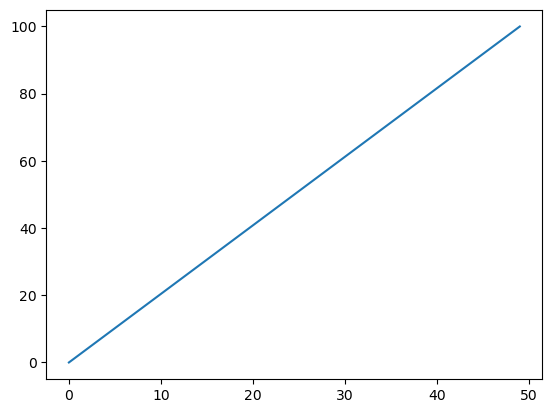

In [32]:
plt.plot(T)
plt.show()

In [30]:
referenceFunction = lambda x : 100*x/Lx

In [31]:
MSQError = np.sqrt(sum((referenceFunction(X) - T)**2)/T.shape[0])

print('Mean squared error:  {:.2e}'.format(MSQError))

Mean squared error:  1.91e-13


### Test #2: Manufactured solution

The manufactured solution will be following the equation: 

$$ T(x) = x^3 -20 x^2 + 20 x$$

In [52]:
referenceFunction = lambda x: 100*(x**3 - 20*x**2 + 20*X)
referenceDeriv = lambda x: 100*(6*x - 40)

Q = -referenceDeriv(X)*rho*cv
qvec = Q/(rho*cv)

b = M@qvec

In [53]:
# Dirichlet boundary conditions
#-------------------------------------------------- 
b[0] = 0
b[-1] = 100

In [54]:
T = Ainv@b

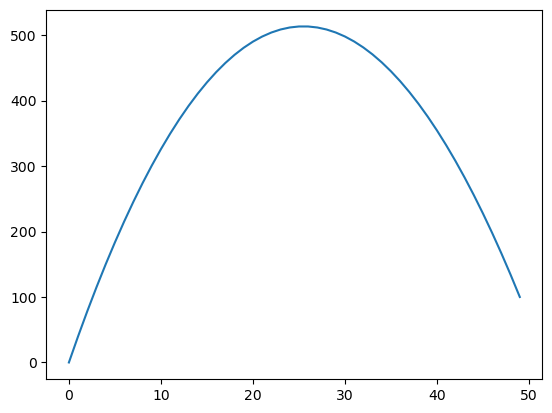

In [55]:
plt.plot(T)
plt.show()

In [56]:
MSQError = np.sqrt(sum((referenceFunction(X) - T)**2)/T.shape[0])

print('Mean squared error:  {:.2e}'.format(MSQError))

Mean squared error:  4.08e-12
